<a href="https://colab.research.google.com/github/Maxibrionest/FMY-Fundamentos-Machine-Learning/blob/main/Actividad_2_3_5/2_3_5_REGRESION_LINEAL_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REGRESION LINEAL II - regresión múltiple
$$y = f(\mathbf{x}) = \beta_0 + x_1\beta_1 + ... + x_k\beta_k$$

## Dataset de pacientes enfermos con diabetes

Se obtuvieron diez variables basales, edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones del suero sanguíneo para cada uno de n = 442 pacientes con diabetes, así como la respuesta de interés, una medida cuantitativa de la progresión de la enfermedad un año después del inicio .

* age: edad en años
* sex
* bmi: índice de masa corporal
* bp: promedio de presión sanguínea
* s1: T-Cells (un tipo de células blancas de la sangre)
* s2: low-density lipoproteins
* s3: high-density lipoproteins
* s4: hormona de estimulación tiroidal
* s5: lamotrigine
* s6: nivel de azúcar en la sangre

Objetivo: medida cuantitativa de la progresión de la enfermedad.


## Cargamos un dataset disponible en sklearn

In [1]:
import pandas as pd

In [2]:
# Cargamos el dataset que se encuentra en la librería sklearn
from sklearn.datasets import load_diabetes
datos = load_diabetes()

In [3]:
# Estos dataset precargados vienen con un formato diferente (no son dataframe)
# entonces, guardamos el conjunto de variables explicativas como un dataframe
# y también guardamos la variable de interés (el target)
X = pd.DataFrame(datos.data, columns=datos.feature_names)
Y = datos.target

In [4]:
X.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

## Creamos y ajustamos un modelo

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, Y)

Y_hat = model.predict(X)

##Evaluamos el desempeño del modelo en base a diferentes métricas!

In [7]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y, Y_hat)

2859.6903987680657

In [8]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y, Y_hat)

43.277395083749866

In [9]:
from sklearn.metrics import r2_score
r2_score(Y, Y_hat)

0.5177494254132934

###  ANÁLISIS

¿Qué significa la métrica "r2_score"? Investiga

- Es el coeficiente de determinacion. A mas cercano a 1, mas se parece a un recta. En caso de ser excatamente 1, los valores entregados corresponden inequivocamente a una recta.

¿Qué indica cada una de las métricas anteriores?

 - MSE o error cuadrado medio es un evaluacion de la suma de los errores al cuadrado entre el modelo obtenido y los valores reales. Penaliza en mayor medida, ya que está al cuadrado, los errores. A menos mejor.


  - MAE o error absoluto promedio es la suma de las distancias entre el modelo y los valores reales. Penaliza menos a los valores atipicos. A menos mejor.

¿Se puede comentar algo sobre la VERIFICACION del modelo?

 - No se ha implementado un sistema de verificacion. No se ha separado un subconjunto ni de practica ni de validacion.



## Graficamos el target esperado contra los resultados que entrega el modelo

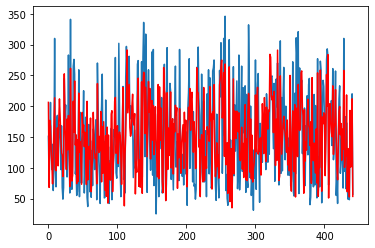

In [10]:
import matplotlib.pyplot as plt
plt.plot(Y)
plt.plot(Y_hat, 'r')

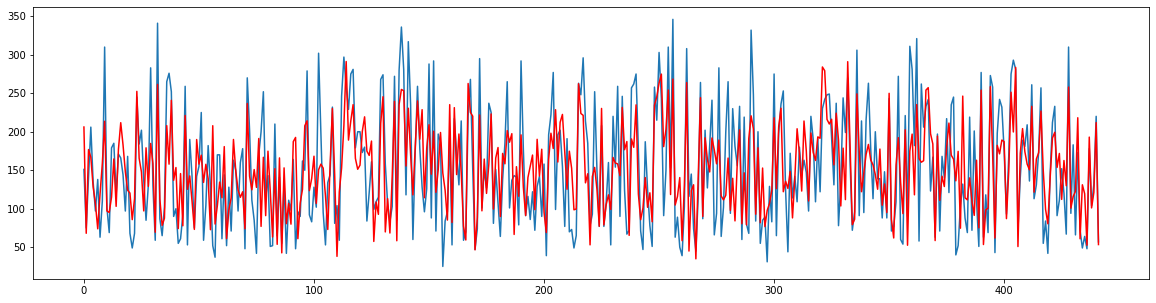

In [11]:
plt.subplots(figsize=(20,5))
plt.plot(Y)
plt.plot(Y_hat, 'r')

### ANÁLISIS

¿Qué puedes comentar sobre estos resultados?

 - Los valores predichos, mostrados en rojo, son demasiado similares a los valores reales. Sigue la tendencia oscilatoria de los datos originales.

El modelo, ¿presenta underfitting u overfitting?, ¿ por qué?

 - Overfitting, los datos del modelo creado son en demasía similares a los reales.

 

## Implementando la mejora de la validación

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.33)

### ANÁLISIS

¿ Qué se realizó en la celda anterior para evitar el overfitting?

 - Se integró una división entre un subgrupo de entrenamiento y uno de validacion. Así se contrasta el modelo sin revision con datos relaes y se vuelve a ajustar.

In [13]:
print(Xtrain.shape)
print(Xtest.shape)

(296, 10)
(146, 10)


2953.7270071129656
43.83702565567359
0.4856816198055437


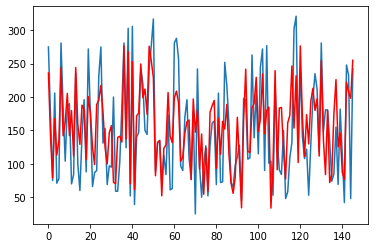

In [14]:
model = LinearRegression()

model.fit(Xtrain, Ytrain)

Y_hat = model.predict(Xtest)

print(mean_squared_error(Ytest, Y_hat))
print(mean_absolute_error(Ytest, Y_hat))
print(r2_score(Ytest, Y_hat))

plt.plot(Ytest)
plt.plot(Y_hat, 'r')

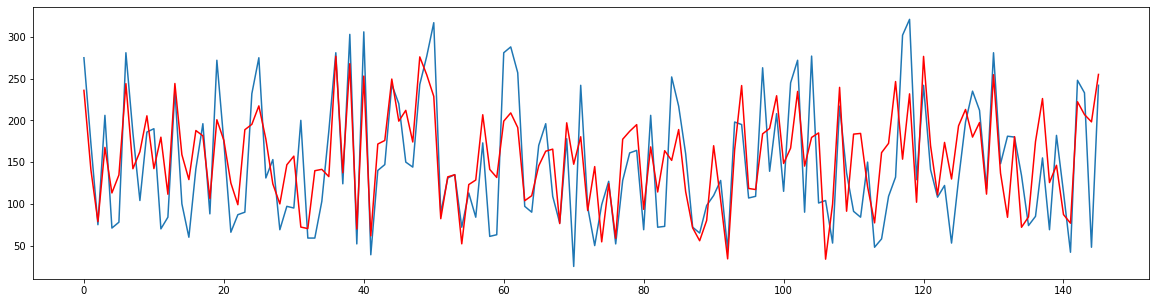

In [15]:
plt.subplots(figsize=(20,5))
plt.plot(Ytest)
plt.plot(Y_hat, 'r')

### CONCLUSIONES

¿Qué puedes concluir de este ejercicio?

 - Es necesario implementar sistemas de validación para obtener modelos mas ajustados a la realidad. Añadirlos, por lo menos por ahora, no implica mayor trabajo cognitivo por lo que hay motivos solo en favor de aplicarlos. Al hacerlo, se mejora la efectividad de nuestro modelo.

